## Set Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
curr_path = '/content/drive/MyDrive/Self-study/ML/melon/'
main_df = pd.read_csv(curr_path + 'melon_data/main_df.csv')
main_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
main_df

,song_gn_dtl_gnr_basket,issue_date,alb_name,alb_id,song_name,id,issue_year,artist_id,song_gn_gnr,artist_name,song_id,is_top
0,['GN0901'],20180518.0,Hit,4698747.0,Solsbury Hill (Remastered 2002),2.0,2018.0,3361.0,GN0900,Peter Gabriel,NaN,False
1,"['GN0105', 'GN0101']",20170320.0,Pastel Reflection,10047088.0,"사랑, 그대라는 멜로디",9.0,2017.0,753752.0,GN0100,진호,NaN,False
2,['GN1201'],20170407.0,Luv.Loops,10053652.0,Hi (Heyoo),10.0,2017.0,1625859.0,GN1200,Miraa.,NaN,False
3,"['GN1701', 'GN1703']",20161117.0,Groove It,10015809.0,Voyage,13.0,2016.0,1221039.0,GN1700,JBeeS Jazz Bigband,NaN,False
4,['GN0901'],20191023.0,Earth Glow,10341972.0,Can&#39;t Stand Still,16.0,2019.0,896417.0,GN0900,Ruelle,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
223639,"['GN1301', 'GN1302']",20181018.0,Colors Compilation,2692383.0,Everybody (Just Bounce),707976.0,2018.0,967093.0,GN1300,Vbnd,NaN,False
223640,"['GN0908', 'GN0901']",20191025.0,My Blood,10343254.0,My Blood,707978.0,2019.0,100377.0,GN0900,Westlife,NaN,False
223641,"['GN0401', 'GN0403']",20171202.0,Mirrorball,10116357.0,Mirrorball (Feat. YunB),707980.0,2017.0,924416.0,GN0400,SUMIN (수민),NaN,False
223642,"['GN2207', 'GN1501', 'GN1506', 'GN1509']",20160601.0,생일왕국의 프린세스 프링 OST1 : 프린세스 프링의 초대,2688257.0,생일축하노래,707981.0,2016.0,889414.0,GN1500,ButterFly,NaN,False


## Data Exploration
### General

In [11]:
main_df.shape

(223644, 12)

In [13]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223644 entries, 0 to 223643
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   song_gn_dtl_gnr_basket  223644 non-null  object 
 1   issue_date              223644 non-null  float64
 2   alb_name                223640 non-null  object 
 3   alb_id                  223644 non-null  float64
 4   song_name               223642 non-null  object 
 5   id                      223644 non-null  float64
 6   issue_year              223644 non-null  float64
 7   artist_id               223644 non-null  float64
 8   song_gn_gnr             222862 non-null  object 
 9   artist_name             223644 non-null  object 
 10  song_id                 1241 non-null    float64
 11  is_top                  223644 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 19.0+ MB


In [25]:
main_df[['song_name','alb_name', 'song_gn_gnr', 'artist_name']] = main_df[['song_name','alb_name', 'song_gn_gnr', 'artist_name']].astype(str)

In [27]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223644 entries, 0 to 223643
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   song_gn_dtl_gnr_basket  223644 non-null  object 
 1   issue_date              223644 non-null  float64
 2   alb_name                223644 non-null  object 
 3   alb_id                  223644 non-null  float64
 4   song_name               223644 non-null  object 
 5   id                      223644 non-null  float64
 6   issue_year              223644 non-null  float64
 7   artist_id               223644 non-null  float64
 8   song_gn_gnr             223644 non-null  object 
 9   artist_name             223644 non-null  object 
 10  song_id                 1241 non-null    float64
 11  is_top                  223644 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 19.0+ MB


No null value, except for song_id which is reasonable because we only have song_id for songs that make it to the top

### Basic Visualization

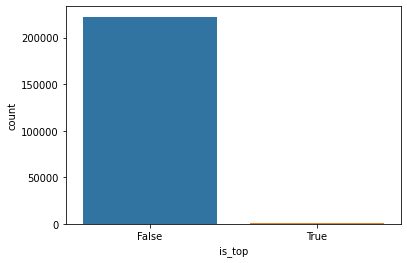

In [33]:
sns.countplot(x = main_df['is_top'])

Unbalance class

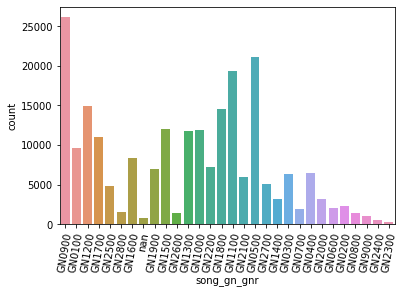

In [42]:
sns.countplot(x = main_df['song_gn_gnr'])
plt.xticks(rotation=80)
plt.show()

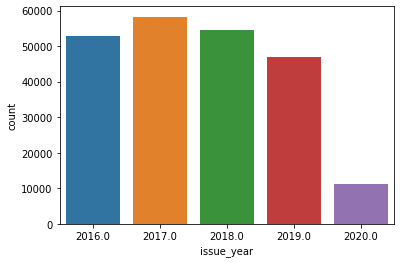

In [43]:
sns.countplot(x = main_df['issue_year'])
plt.show()

Fewer songs from 2020